In [6]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# load vic parameter file
vic_param = nc.Dataset('/Users/sidaliu/Documents/github_repo/VIC_params_Mirca_calibrated_Indus.nc')
# print out the variable names
print(vic_param.variables.keys())


dict_keys(['AreaFract', 'Nelev', 'Pfactor', 'elev', 'elevation', 'lat', 'lon', 'snow_band', 'Ds', 'Dsmax', 'Ws', 'c', 'infilt', 'annual_prec', 'avg_T', 'run_cell', 'Cv', 'LAI', 'Nveg', 'RGL', 'albedo', 'displacement', 'fcanopy', 'month', 'overstory', 'rad_atten', 'rarc', 'rmin', 'root_depth', 'root_fract', 'root_zone', 'trunk_ratio', 'veg_class', 'veg_rough', 'wind_atten', 'wind_h', 'b_co2', 'Ksat', 'Nlayer', 'Wcr_FRACT', 'Wfc_FRACT', 'Wpwp_FRACT', 'bubble', 'bulk_density', 'depth', 'dp', 'expt', 'fs_active', 'init_moist', 'phi_s', 'quartz', 'resid_moist', 'rough', 'snow_rough', 'soil_density'])


In [8]:
# load the ksat parameter
ksat = vic_param.variables['Ksat'][:]
# split the ksat into 3 layers
ksat_layer1 = ksat[0, :, :]
ksat_layer2 = ksat[1, :, :]
ksat_layer3 = ksat[2, :, :]

# do an average of the 3 layers
ksat_avg = (ksat_layer1 + ksat_layer2 + ksat_layer3) / 3
#ksat_avg = ksat_avg.data

In [9]:
type(ksat_avg)
ksat_mask = ksat_avg.mask

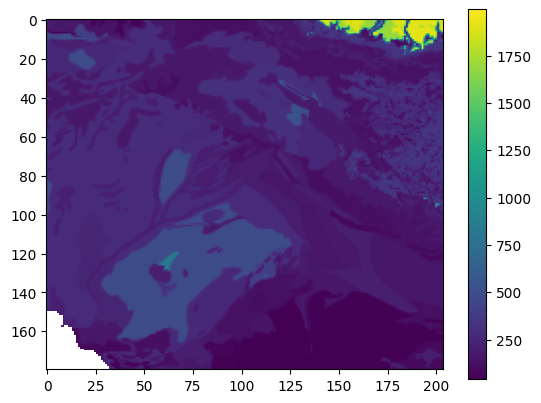

249.95385496761367


In [11]:
# store the mask array of ksat_avg into a new variable
ksat_mask = ksat_avg.mask
ksat_avg1 = ksat_avg.copy()
# convert the ksat_avg into a numpy array
#ksat_avg1 = ksat_avg.data
# replace the masked values with 0
ksat_avg1[ksat_mask] = np.nan
ksat_avg1 = np.flip(ksat_avg1, axis=0)

# plot the ksat_avg

plt.imshow(ksat_avg1)
plt.colorbar()
plt.show()
# calculate mean without nan
mean = np.nanmean(ksat_avg1)
print(mean)

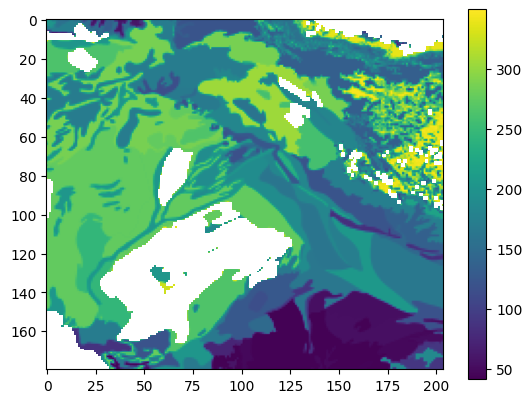

In [18]:
# only keep the values that are less than 100mm/day
ksat_avg2 = ksat_avg1.copy()
ksat_avg2[ksat_avg1 > 350] = np.nan 
plt.imshow(ksat_avg2)
plt.colorbar()
plt.show()